In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
#st.linregress(x, y) - выдает все нужыне параметры
df = pd.read_excel('Книга1.xlsx',index_col=0,header=1).iloc[:,0:3]
df

,Валовый доход за год(y),основных фондов(x1),оборотных средств(x2)
номер предприятия,,,
1,203,118,105
2,63,28,56
3,45,17,54
4,113,50,63
5,121,56,28
6,88,102,50
7,110,116,54
8,56,124,42
9,80,114,36


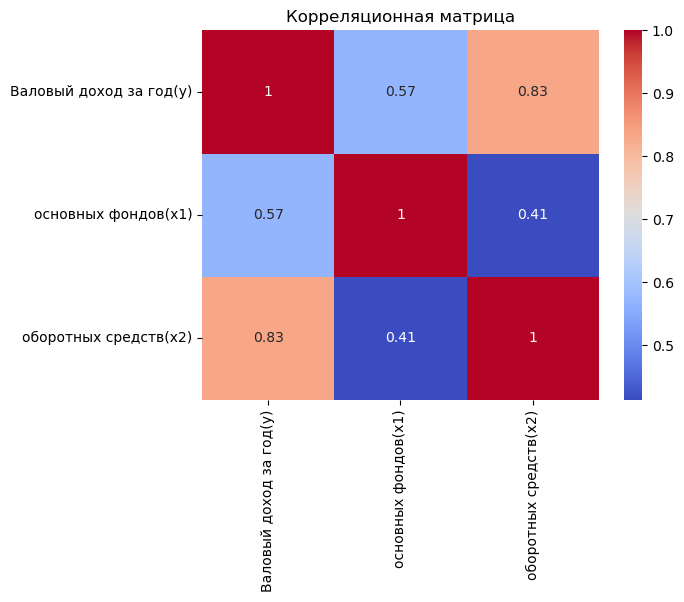

3
Связь между Валовый доход за год(y) и основных фондов(x1) - ПРЯМАЯ УМЕРЕННАЯ (коэффициент корреляции 0.571 - статистически не значим)

Связь между Валовый доход за год(y) и оборотных средств(x2) - ПРЯМАЯ СИЛЬНАЯ (коэффициент корреляции 0.833 - статистически значим)



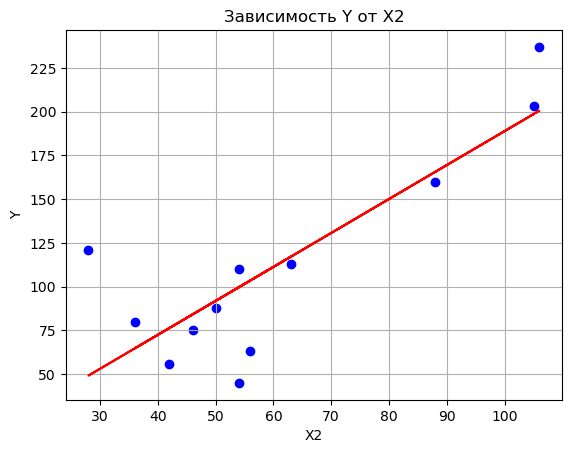

Корреляция = 0.8328694786479363

b1 = 1.9405803777061263
b0 = -5.145209580838326

var    657.878788
std     25.649148
Name: оборотных средств(x2), dtype: float64

('b1 = ', 1.9405803777061263)
('b0 = ', -5.145209580838326)
('Коэффициент корреляции: r_value = ', 0.832869478647936)
('Минимальный уровень значимости: p_value = ', 0.0007701208856296058)
('Стандартная ошибка: std_err = ', 0.4078010522754272)
Детерминация: r^2= 0.6936715684632848


In [35]:
import matplotlib.pyplot as plt
def check_relations(data,y_col=0,led=1,show_all=True):
    sns.heatmap(df.iloc[:,y_col:].corr(), annot=True, cmap='coolwarm')
    plt.title('Корреляционная матрица')
    plt.show()
    corr_matrix = data.corr()
    names = corr_matrix.index.values
    n = corr_matrix.shape[0]
    factors = [f'X{i+1}' for i in range(n)]
    print(n)
    for i in range(1, n):

        
        x = np.array(df.iloc[:, i-1+led])
        y = np.array(df.iloc[:, y_col])
        n = np.size(x) 
        
        r=data.iloc[:,(i-1+led)].corr( data.iloc[:,y_col])
        ans=''
        if r > 0:
            ans += 'ПРЯМАЯ '
        elif r < 0:
                ans += 'ОБРАТНАЯ '
                
        if abs(r) == 0:
                ans += 'НЕ НАБЛЮДАЕТСЯ '
        elif abs(r) < 0.3:
                ans += 'ОЧЕНЬ СЛАБАЯ '
        elif 0.3 <= abs(r) < 0.5:
                ans += 'СЛАБАЯ'
        elif 0.5 <= abs(r) < 0.7:
                ans += 'УМЕРЕННАЯ '
        elif 0.7 <= abs(r) < 1:
                ans += 'СИЛЬНАЯ '
        else:
                ans += 'ФУНКЦИОНАЛЬНАЯ '
        show_off=True
        if st.ttest_rel(data.iloc[:, y_col], data.iloc[:, i])[1] < 0.05:
                ans += f'(коэффициент корреляции {r:.3f} - статистически значим)'
        else:
                ans += f'(коэффициент корреляции {r:.3f} - статистически не значим)'
                show_off=False
        if show_all:
            show_off=True
        print(f'Связь между {names[0]} и {names[i]} - {ans}\n')
        
        if show_off:
            x_mean = np.mean(x) 
            y_mean = np.mean(y) 
            x_mean,y_mean 
            
            Sxy = np.sum(x*y) - n*x_mean*y_mean 
            Sxx = np.sum(x*x) - n*x_mean*x_mean 
            
            b1 = Sxy / Sxx 
            b0 = y_mean - b1*x_mean 
            y_pred = b1 * x + b0 
            plt.figure()
            # Создаем новую фигуру для каждой диаграммы   
            plt.scatter(data.iloc[:,(i-1+led)], data.iloc[:,y_col],color='blue')
            plt.plot(x, y_pred, color = 'red') 
            plt.xlabel(factors[i-1])
            plt.ylabel('Y')
            plt.title(f'Зависимость Y от {factors[i-1]}')
            plt.grid(True)
            plt.show()
            print(f'Корреляция = {data.iloc[:,(i-1+led)].corr( data.iloc[:,y_col])}')
            print()
            print('b1 =', b1) 
            print('b0 =', b0)
            print()
            print(data.iloc[:,i-1+led].agg(['var','std']))
            print()
            print(*list(zip('b1 = ,b0 = ,Коэффициент корреляции: r_value = ,Минимальный уровень значимости: p_value = ,Стандартная ошибка: std_err = '.split(','),list(st.linregress(x, y)))), sep='\n')
            print('Детерминация: r^2= ',end='')
            print(float(list(st.linregress(x, y))[2])**2)

        
    
check_relations(df.iloc[:, 0:],show_all=False)

   
    